# Import Libraries and Data ⬇️

In [1]:
import warnings
warnings.simplefilter('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
df=pd.read_csv('water_potability.csv')
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681736,47580.99160,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.80216,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.57822,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.86938,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


# Data Cleaning and Preparation 🔧

In [15]:
#Let's check th shape
df.shape

(3276, 10)

In [16]:
#Types as well
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [17]:
# Checking for missing values
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [18]:
# Missing value treatment
ph_mean=df["ph"].mean()
Sulfate_mean=df["Sulfate"].mean()
Trihalomethanes_mean=df["Trihalomethanes"].mean()
df["ph"].replace(np.nan,ph_mean,inplace=True)
df["Sulfate"].replace(np.nan,Sulfate_mean,inplace=True)
df["Trihalomethanes"].replace(np.nan,Trihalomethanes_mean,inplace=True)
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681736,47580.99160,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.80216,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.57822,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.86938,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


In [19]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

Nice!😄

In [20]:
# Lets get some statistatical data
df.describe(include="all")

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.469956,32.879761,8768.570828,1.583085,36.142612,80.824064,3.308162,15.769881,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690300,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.080795,196.967627,20927.833605,7.130299,333.775777,421.884968,14.218338,66.396293,3.955028,0.000000
75%,7.870050,216.667456,27332.762125,8.114887,350.385756,481.792305,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196010,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [21]:
# Getting information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


<AxesSubplot:>

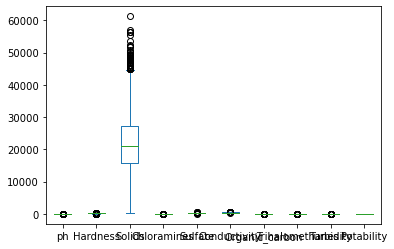

In [22]:
#Checking for outliers
df.plot.box()

Looks like Solids have outliers present in it. Let's check.

In [13]:
# Checking outliers in Solids
df1 = df[df["Solids"] >= 40000]
df1

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
15,6.347272,186.732881,41065.23476,9.629596,364.487687,516.743282,11.539781,75.071617,4.376348,0
119,7.812804,196.583886,42550.84182,7.334648,333.775777,442.545774,14.666917,66.396293,6.204846,0
142,6.825468,187.051710,46140.12685,6.137757,352.702182,373.427235,12.606382,58.752201,3.027450,0
186,6.340028,225.028148,45222.50667,5.809032,363.005755,435.500457,11.385937,80.670311,3.686001,0
283,10.356119,136.323752,48621.56395,9.158704,327.922751,365.720291,17.975564,77.359854,4.201849,1
...,...,...,...,...,...,...,...,...,...,...
3215,5.608623,271.882219,43680.22252,4.157335,366.866533,450.896053,16.442753,61.249762,3.777508,1
3226,7.870853,210.627825,51731.82055,6.190963,333.775777,533.291262,15.029899,84.335058,4.221614,1
3236,4.767472,256.449917,48007.86813,5.773180,333.775777,590.429550,16.541561,44.938586,3.893378,1
3250,7.371914,148.193698,42059.38042,7.966710,324.546262,544.848432,17.166504,62.677756,4.338957,1


In [14]:
#Dropping the above outliers as it may affect the outcome of the model
df = df[df["Solids"] <= 40000]
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3270,6.069616,186.659040,26138.78019,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1
3272,7.808856,193.553212,17329.80216,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.57822,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.86938,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


<AxesSubplot:>

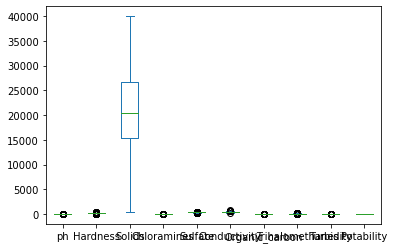

In [15]:
df.plot.box()

Nice!😄

In [13]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [14]:
df['Potability'].unique()

array([0, 1], dtype=int64)

# Data Visualization📊

In [13]:
df['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

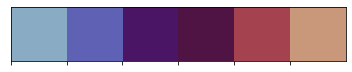

In [27]:
colors = sns.color_palette('twilight')[0:6]
sns.palplot(colors)

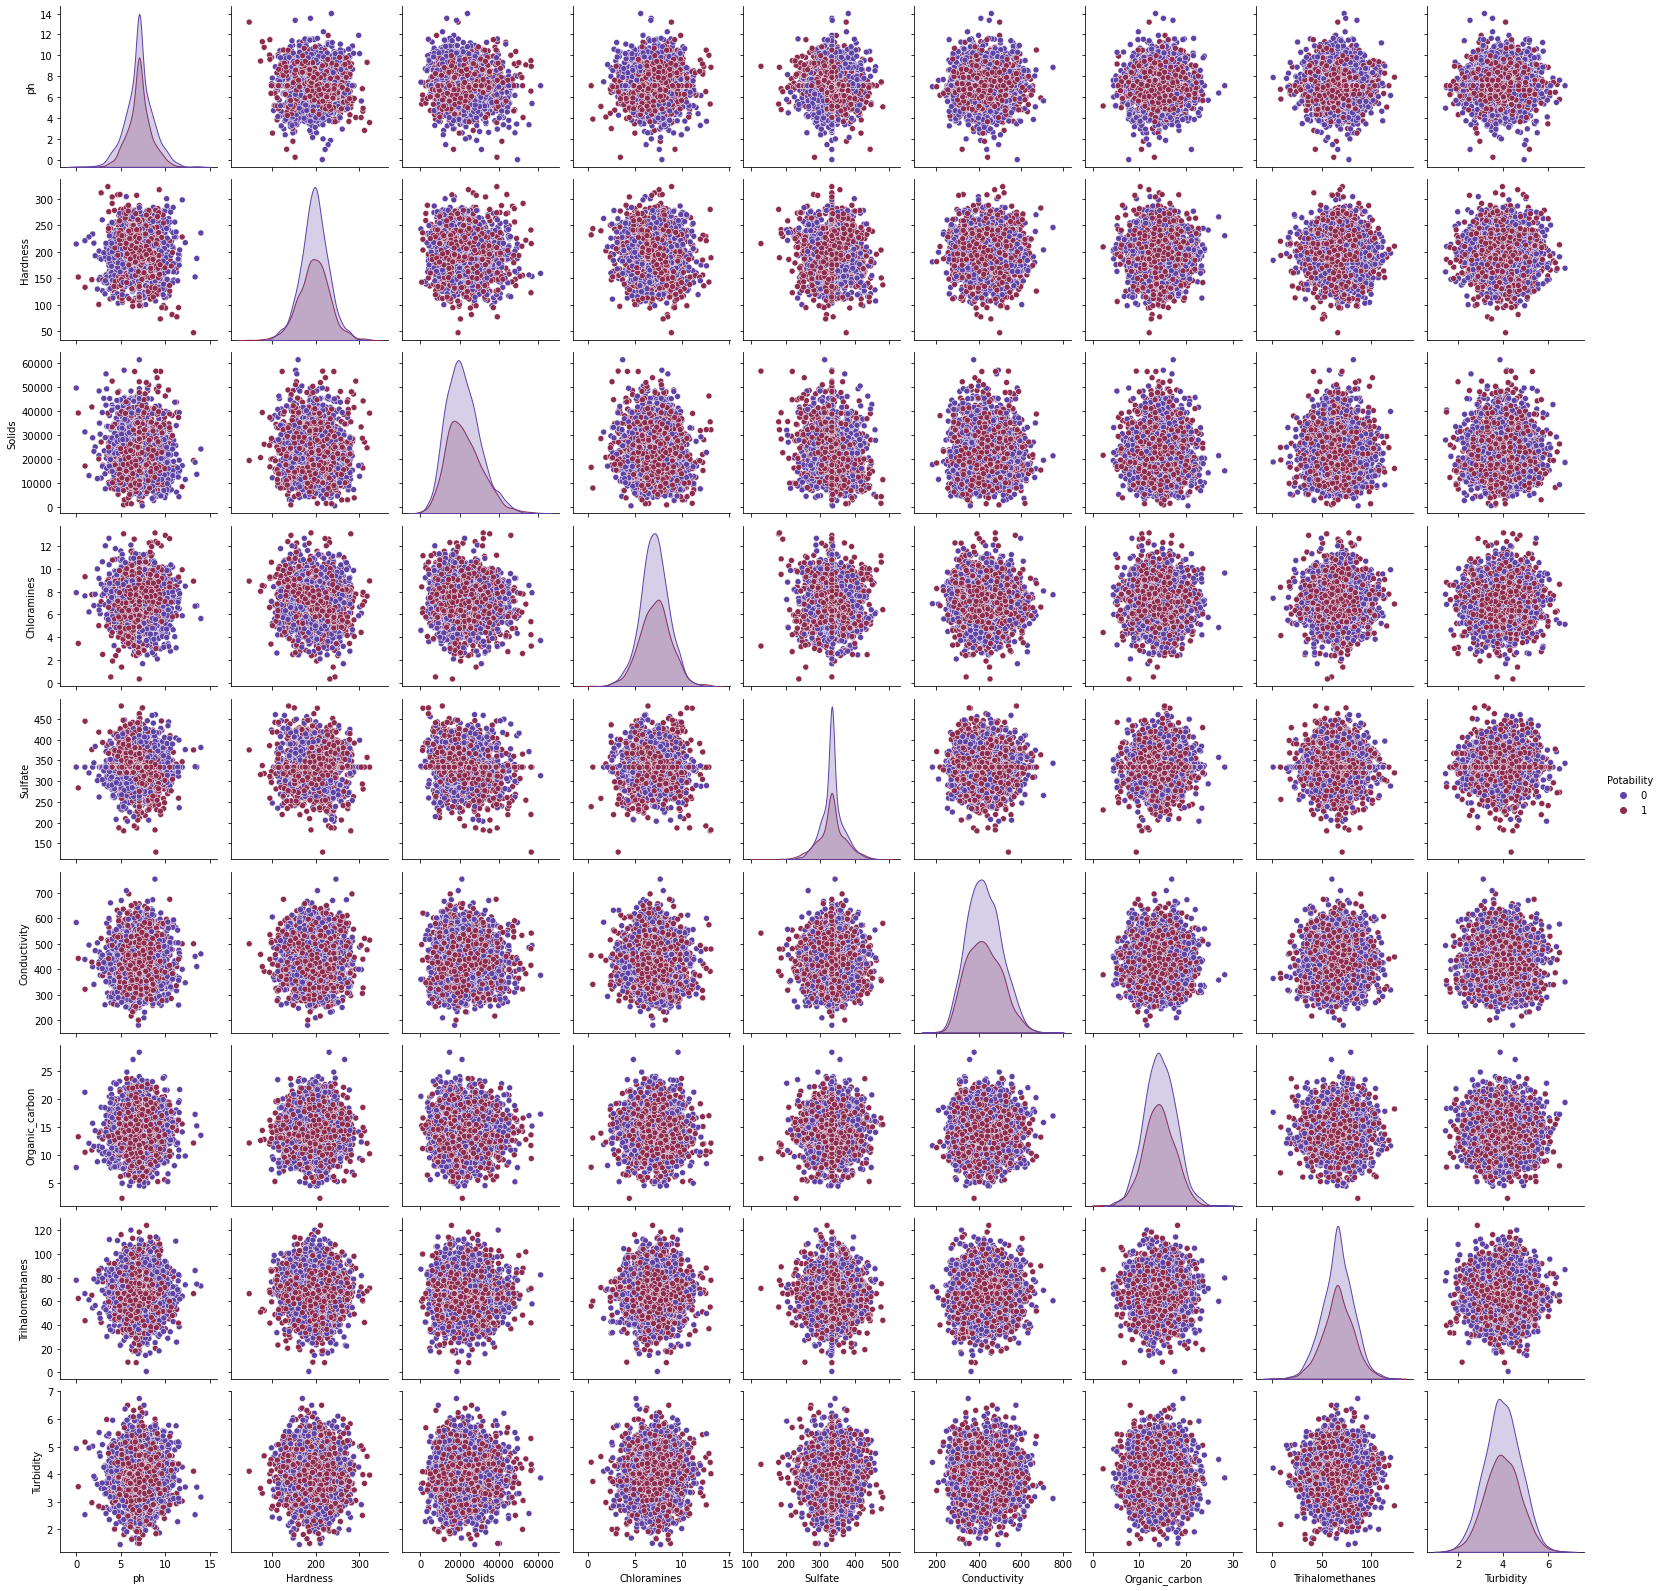

In [31]:
ax = sns.pairplot(df, hue="Potability",diag_kind="kde",kind="scatter",palette="twilight")
plt.show()

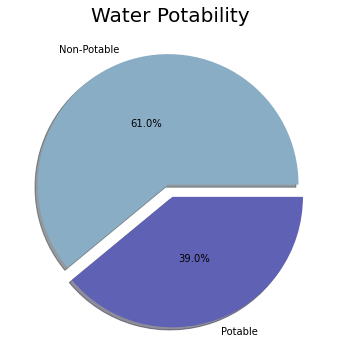

In [28]:
labels = ['Non-Potable', 'Potable']
data = [df['Potability'].value_counts()[0],
         df['Potability'].value_counts()[1]
        ]
fig1, ax1 = plt.subplots(figsize=[15,6])
ax1.pie(data, labels=labels,explode=[0.05]*2, autopct='%1.1f%%',pctdistance=0.5, shadow=True, colors = colors)
plt.title("Water Potability", fontsize=20);
plt.show()

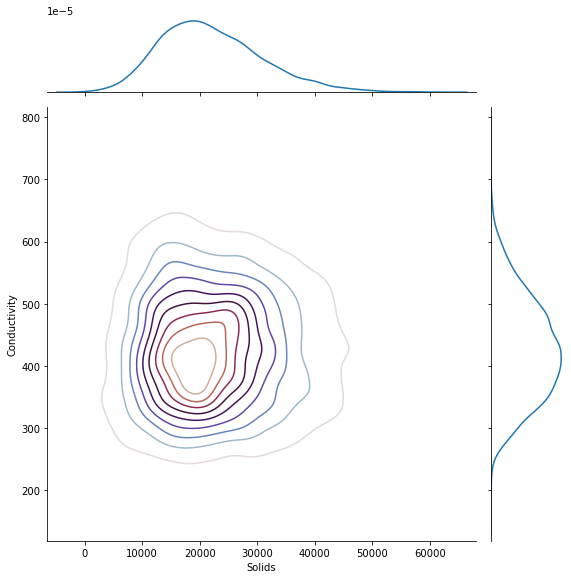

In [39]:
#Relation between Solids and Conductivity
ax = sns.jointplot(x="Solids", y="Conductivity", data=df, cmap = "twilight", kind="kde",palette =colors, height =8, aspect=0.95)

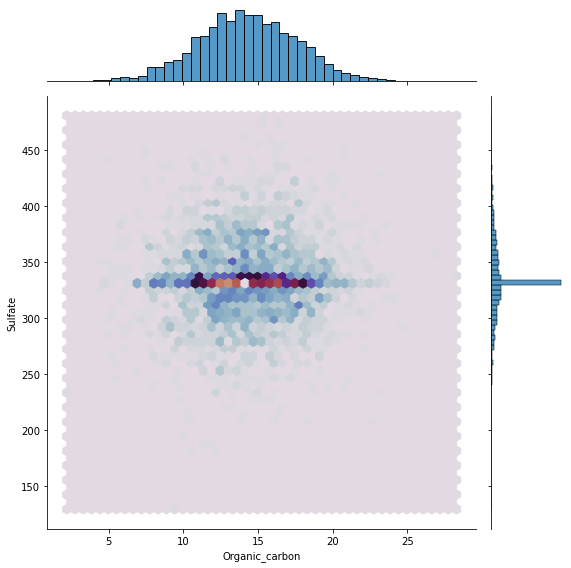

In [44]:
#Relation between Organic_carbon and Sulfate
ax = sns.jointplot(x="Organic_carbon", y="Sulfate", data=df, cmap = "twilight", kind="hex",palette =colors, height =8)

<AxesSubplot:>

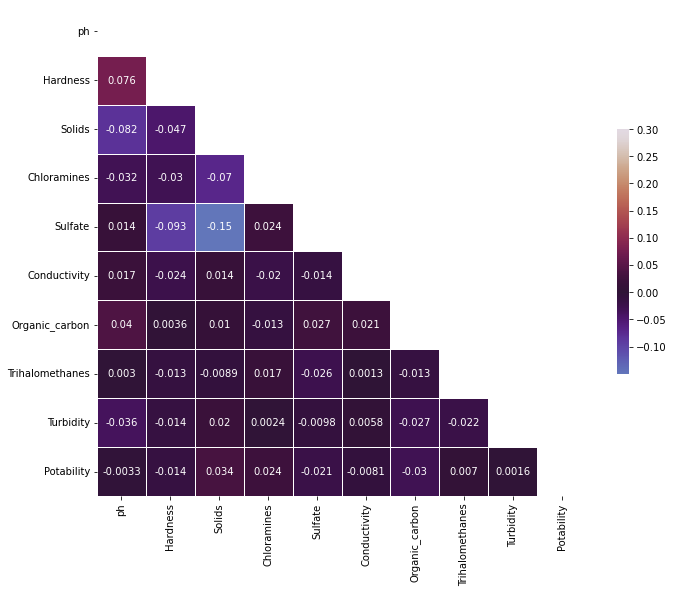

In [46]:
#Annotated Heat Map
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))

sns.heatmap(corr, mask=mask, cmap="twilight", vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot =True)

**Solids is positively correlated the most with our target i.e., potability. Let's plot this againest each other.**

<AxesSubplot:xlabel='Solids', ylabel='Count'>

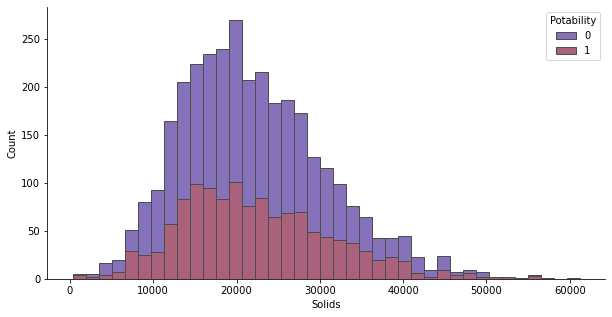

In [48]:
f, ax = plt.subplots(figsize=(10,5))
sns.despine(f)

sns.histplot(df,x="Solids", hue="Potability",multiple="stack",palette="twilight",edgecolor=".3")

# Modeling🏗️

## Segregating the dataset

In [13]:
x = df.copy()
y = x.pop('Potability')

In [14]:
y.shape

(3276,)

In [15]:
y

0       0
1       0
2       0
3       0
4       0
       ..
3271    1
3272    1
3273    1
3274    1
3275    1
Name: Potability, Length: 3276, dtype: int64

In [16]:
x.shape

(3276, 9)

In [17]:
x

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.080795,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.05786,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.54173,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681736,47580.99160,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821
3272,7.808856,193.553212,17329.80216,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243
3273,9.419510,175.762646,33155.57822,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875
3274,5.126763,230.603758,11983.86938,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658


## Divide the dataset into Training and Testing sets

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [20]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2457, 9)
(819, 9)
(2457,)
(819,)


## Normalize the data

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [22]:
X_train

array([[-4.36519231e-02, -8.94481590e-01, -4.48831224e-01, ...,
        -1.08032013e+00, -1.36102526e+00,  1.63612725e-01],
       [ 8.51477354e-06, -1.60795081e-01, -9.03484506e-01, ...,
        -7.29093567e-01, -4.57630642e-02,  2.48641958e-01],
       [-1.77026132e+00,  7.48288521e-02,  1.69448116e+00, ...,
        -1.85111797e+00,  5.79113240e-01, -1.55877319e+00],
       ...,
       [-2.95429798e-01, -1.45698592e-01, -7.71679664e-01, ...,
         3.43504906e-01, -6.31554240e-01, -1.86640607e-01],
       [ 4.06259528e-01,  1.12244893e+00,  1.94670067e-01, ...,
         1.24991468e+00, -3.49315450e-01,  1.37455676e+00],
       [ 8.51477354e-06, -1.09166337e+00, -9.11915047e-01, ...,
         2.74620619e-01,  5.73183463e-01,  2.15392686e-01]])

In [4]:
#Creating empty DataFrame for holding models information
cols = ['Model Name','F1 Score', 'Precision', 'Recall', 'Accuracy']
model_results = pd.DataFrame(columns = cols)

# KNN Classifier

*k- Nearest Neighbors is one of the most basic algorithms used in supervised machine learning. It classifies new data points based on similarity index which is usually a distance metric. It uses a majority vote will classifying the new data. For example, if there are 3 blue dots and 1 dot near the new data point, it will classify it as a blue dot.*

In [28]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [29]:
y_pred = classifier.predict(X_test)

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[448  54]
 [250  67]]


0.6288156288156288

## Hyperparameter Tuning 👷‍♂️
A hyperparameter is a parameter of the model that is set before the start of learning process. Different machine learning models have different hyperparameters. You can find out more about the different hyperparameters of k-NN here.

We will use the Exhaustive Grid Search technique for hyperparameter optimization. An exhaustive grid search takes in as many hyperparameters as you would like, and tries every single possible combination of the hyperparameters as well as as many cross-validations as you would like it to perform. An exhaustive grid search is a good way to determine the best hyperparameter values to use, but it can quickly become time consuming with every additional parameter value and cross-validation that you add.

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 2)

We will use three hyperparamters- n-neighbors, weights and metric.

n_neighbors: Decide the best k based on the values we have computed earlier.
weights: Check whether adding weights to the data points is beneficial to the model or not. 'uniform' assigns no weight, while 'distance' weighs points by the inverse of their distances meaning nearer points will have more weight than the farther points.
metric: The distance metric to be used will calculating the similarity.

In [33]:
grid_params = { 'n_neighbors' : [25,30, 35, 40, 45, 50],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [34]:
gs = GridSearchCV(classifier, grid_params, verbose = 1, cv=3)

Since we have provided the class validation score as 3( cv= 3), Grid Search will evaluate the model 6 x 2 x 3 x 3 = 108 times with different hyperparameters.


In [35]:
# fit the model on our train set
g_res = gs.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


In [36]:
# find the best score
g_res.best_score_

0.6581196581196581

In [37]:
# get the hyperparameters with the best score
g_res.best_params_

{'metric': 'manhattan', 'n_neighbors': 30, 'weights': 'distance'}

In [38]:
# use the best hyperparameters
knn = KNeighborsClassifier(n_neighbors = 30, weights = 'distance',metric = 'manhattan')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=30, weights='distance')

In [39]:
# get a prediction
y_knn = knn.predict(X_test)

In [40]:
y_knn_train = knn.predict(X_train)

In [41]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
  
# print classification report
report = classification_report(y_test, y_knn)
print(report)
cm = confusion_matrix(y_test, y_knn)
print(cm)
accuracy = accuracy_score(y_test, y_knn)
print(accuracy)

              precision    recall  f1-score   support

           0       0.65      0.93      0.76       502
           1       0.65      0.20      0.30       317

    accuracy                           0.65       819
   macro avg       0.65      0.57      0.53       819
weighted avg       0.65      0.65      0.59       819

[[468  34]
 [254  63]]
0.6483516483516484


In [42]:
from sklearn.metrics import precision_score, recall_score, f1_score

f1_score = f1_score(y_test, y_knn, average='weighted')
print('f1_score:', f1_score)
Recall = recall_score(y_test, y_knn, average='weighted')
print('Recall:', Recall)
Precision = precision_score(y_test, y_knn, average='weighted')
print('Precision:', Precision)

f1_score: 0.5865208959838116
Recall: 0.6483516483516484
Precision: 0.6486968495992684


In [5]:
model_results.loc[-1] = ["KNN", 0.58, 0.64, 0.64, 0.648]
model_results.index = model_results.index + 1  # shifting index
model_results = model_results.sort_index()  # sorting by index
model_results

,Model Name,F1 Score,Precision,Recall,Accuracy
0,KNN,0.58,0.64,0.64,0.648


## Gaussian NB (GNB)

In [43]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [44]:
y_pred = classifier.predict(X_test)

In [45]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[433  69]
 [251  66]]


0.6092796092796092

In [46]:
# get a prediction
y_pred = classifier.predict(X_test)

In [47]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
  
# print classification report
report = classification_report(y_test, y_pred)
print(report)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

              precision    recall  f1-score   support

           0       0.63      0.86      0.73       502
           1       0.49      0.21      0.29       317

    accuracy                           0.61       819
   macro avg       0.56      0.54      0.51       819
weighted avg       0.58      0.61      0.56       819

[[433  69]
 [251  66]]
0.6092796092796092


In [48]:
from sklearn.metrics import precision_score, recall_score, f1_score

f1_score = f1_score(y_test, y_pred, average='weighted')
print('f1_score:', f1_score)
Recall = recall_score(y_test, y_pred, average='weighted')
print('Recall:', Recall)
Precision = precision_score(y_test, y_pred, average='weighted')
print('Precision:', Precision)

f1_score: 0.5605962649195648
Recall: 0.6092796092796092
Precision: 0.5772458211054702


In [6]:
model_results.loc[-1] = ["GNB", 0.56, 0.57, 0.60, 0.609]
model_results.index = model_results.index + 1  # shifting index
model_results = model_results.sort_index()  # sorting by index
model_results

,Model Name,F1 Score,Precision,Recall,Accuracy
0,GNB,0.56,0.57,0.60,0.609
1,KNN,0.58,0.64,0.64,0.648


# Decision Tree Classifier (DTC)

In [64]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [65]:
y_pred = classifier.predict(X_test)

In [66]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[335 167]
 [163 154]]


0.5970695970695971

## Hyperparameter Tuning 👷‍♂️
We will be using and training model using these parameters- criterion, max_depth, min_samples_split, min

In [67]:
param_dict = {
    'criterion':['gini', 'entropy'],
    'max_depth':range(1,10),
    'min_samples_split':range(2,10),
    'min_samples_leaf':range(1,5),
}

In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(DecisionTreeClassifier(), 
             param_grid = param_dict, cv = 5, verbose = 1, n_jobs=1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [69]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'min_samples_leaf': 4,
 'min_samples_split': 9}

In [70]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=8, min_samples_leaf=4, min_samples_split=9)

In [71]:
# use the best hyperparameters
classifier = DecisionTreeClassifier(criterion= 'gini',max_depth= 8, min_samples_leaf= 4, 
                                    min_samples_split= 9, random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=4, min_samples_split=9,
                       random_state=0)

In [72]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_classifier = classifier.predict(X_test)
# print classification report
print(classification_report(y_test, y_classifier))
cm = confusion_matrix(y_test, y_classifier)
print(cm)
accuracy_score(y_test, y_classifier)

              precision    recall  f1-score   support

           0       0.64      0.87      0.74       502
           1       0.53      0.24      0.33       317

    accuracy                           0.62       819
   macro avg       0.59      0.55      0.53       819
weighted avg       0.60      0.62      0.58       819

[[435  67]
 [241  76]]


0.6239316239316239

In [7]:
model_results.loc[-1] = ["DTC", 0.58, 0.60, 0.62, 0.623]
model_results.index = model_results.index + 1  # shifting index
model_results = model_results.sort_index()  # sorting by index
model_results

,Model Name,F1 Score,Precision,Recall,Accuracy
0,DTC,0.58,0.60,0.62,0.623
1,GNB,0.56,0.57,0.60,0.609
2,KNN,0.58,0.64,0.64,0.648


## Support Vector Machine(SVM)

In [49]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train, y_train)

SVC()

In [50]:
classifier._gamma

0.1111111111111111

In [51]:
y_pred = classifier.predict(X_test)

In [54]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[465  37]
 [232  85]]


0.6715506715506715

## Hyperparameter Tuning 👷‍♂️

One of the great things about GridSearchCV is that it is a meta-estimator. It takes an estimator like SVC, and creates a new estimator, that behaves exactly the same – in this case, like a classifier. We should add refit=True and choose verbose to whatever number you want, higher the number, the more verbose (verbose just means the text output describing the process).

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'sigmoid']}# excluding poly beacuse its taking a long time 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

In [56]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.610 total time=   0.8s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.608 total time=   0.8s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.609 total time=   0.8s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.609 total time=   0.7s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.609 total time=   0.5s
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.537 total time=   0.4s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.528 total time=   0.6s
[CV 3/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.483 total time=   0.5s
[CV 4/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.527 total time=   0.3s
[CV 5/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.546 total time=   0.3s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.610 total time=   0.3s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

[CV 2/5] END .........C=10, gamma=1, kernel=rbf;, score=0.600 total time=   0.8s
[CV 3/5] END .........C=10, gamma=1, kernel=rbf;, score=0.607 total time=   0.7s
[CV 4/5] END .........C=10, gamma=1, kernel=rbf;, score=0.601 total time=   0.8s
[CV 5/5] END .........C=10, gamma=1, kernel=rbf;, score=0.585 total time=   0.9s
[CV 1/5] END .....C=10, gamma=1, kernel=sigmoid;, score=0.528 total time=   0.3s
[CV 2/5] END .....C=10, gamma=1, kernel=sigmoid;, score=0.506 total time=   0.4s
[CV 3/5] END .....C=10, gamma=1, kernel=sigmoid;, score=0.499 total time=   0.5s
[CV 4/5] END .....C=10, gamma=1, kernel=sigmoid;, score=0.519 total time=   0.4s
[CV 5/5] END .....C=10, gamma=1, kernel=sigmoid;, score=0.550 total time=   0.6s
[CV 1/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.685 total time=   0.7s
[CV 2/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.667 total time=   0.7s
[CV 3/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.664 total time=   0.7s
[CV 4/5] END .......C=10, ga

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'sigmoid']},
             verbose=3)

In [57]:
grid.best_score_

0.6739878793899955

In [58]:
# get the hyperparameters with the best score
grid.best_params_ 

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [59]:
# use the best hyperparameters
classifier = SVC(kernel='rbf', gamma=0.1, C=1, random_state = 0, probability=True)
classifier.fit(X_train, y_train)

SVC(C=1, gamma=0.1, probability=True, random_state=0)

In [62]:
y_classifier = grid.predict(X_test)

In [63]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
  
# print classification report
print(classification_report(y_test, y_classifier))
cm = confusion_matrix(y_test, y_classifier)
print(cm)
accuracy = accuracy_score(y_test, y_classifier)
print(accuracy)

              precision    recall  f1-score   support

           0       0.66      0.93      0.78       502
           1       0.71      0.25      0.37       317

    accuracy                           0.67       819
   macro avg       0.69      0.59      0.57       819
weighted avg       0.68      0.67      0.62       819

[[469  33]
 [237  80]]
0.6703296703296703


We are getting a accuracy of 67.39 percent.

In [8]:
model_results.loc[-1] = ["SVM", 0.62, 0.68, 0.67, 0.678]
model_results.index = model_results.index + 1  # shifting index
model_results = model_results.sort_index()  # sorting by index
model_results

,Model Name,F1 Score,Precision,Recall,Accuracy
0,SVM,0.62,0.68,0.67,0.678
1,DTC,0.58,0.60,0.62,0.623
2,GNB,0.56,0.57,0.60,0.609
3,KNN,0.58,0.64,0.64,0.648


# Random Forest Classifier(RFC)

In [76]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [77]:
y_pred = classifier.predict(X_test)

In [78]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[451  51]
 [217 100]]


0.6727716727716728

## Hyperparameter Tuning 👷‍♂️
We will try adjusting the following set of hyperparameters:

n_estimators = number of trees in the foreset
max_features = max number of features considered for splitting a node
max_depth = max number of levels in each decision tree
min_samples_split = min number of data points placed in a node before the node is split
min_samples_leaf = min number of data points allowed in a leaf node
bootstrap = method for sampling data points (with or without replacement)
I will use RandomizedSearchCV instead of GridSearchCV, we first need to create a parameter grid to sample from during fitting. You can try GridSearchCV too.

In [79]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [80]:
from sklearn.ensemble import RandomForestClassifier
# Use the random grid to search for best hyperparameters
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   1.6s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   1.5s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   1.4s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=   6.7s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=   6.7s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=   6.3s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200;

[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1800; total time=  10.7s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1800; total time=  10.4s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1800; total time=  10.1s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1600; total time=   9.8s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1600; total time=   9.5s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1600; total time=   9.1s
[CV] END bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1400; total time=   5.0s
[CV] END bootstrap=True, max_dep

[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.6s
[CV] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   2.2s
[CV] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   2.2s
[CV] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   2.1s
[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   2.8s
[CV] END bootstrap=True, max_depth=90, max_fe

[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   1.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   1.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   1.1s
[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   5.9s
[CV] END bootstrap=False, max_depth=80, max_f

[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=  11.4s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=  10.9s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=  10.6s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   2.1s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   2.2s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   2.1s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   3.6s
[CV] END bootstrap=True, max_depth

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [81]:
rf_random.best_score_

0.6617826617826618

In [82]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 80,
 'bootstrap': True}

In [83]:
rf_random.best_estimator_

RandomForestClassifier(max_depth=80, min_samples_split=5, n_estimators=600)

In [84]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_grid_search = rf_random.predict(X_test)
# print classification report
print(classification_report(y_test, y_grid_search))
cm = confusion_matrix(y_test, y_grid_search)
print(cm)
accuracy = accuracy_score(y_test, y_grid_search)
print(accuracy)

              precision    recall  f1-score   support

           0       0.68      0.91      0.78       502
           1       0.68      0.31      0.42       317

    accuracy                           0.68       819
   macro avg       0.68      0.61      0.60       819
weighted avg       0.68      0.68      0.64       819

[[457  45]
 [220  97]]
0.6764346764346765


In [9]:
model_results.loc[-1] = ["RFC", 0.64, 0.68, 0.68, 0.676]
model_results.index = model_results.index + 1  # shifting index
model_results = model_results.sort_index()  # sorting by index
model_results

,Model Name,F1 Score,Precision,Recall,Accuracy
0,RFC,0.64,0.68,0.68,0.676
1,SVM,0.62,0.68,0.67,0.678
2,DTC,0.58,0.60,0.62,0.623
3,GNB,0.56,0.57,0.60,0.609
4,KNN,0.58,0.64,0.64,0.648


Not getting better accuracy let's try a boost algorithm but best till now.

## XGBoost

In [87]:
from xgboost import XGBClassifier
classifier = XGBClassifier(eval_metric = 'merror')
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='merror', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [88]:
y_pred = classifier.predict(X_test)

In [89]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# print classification report
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

              precision    recall  f1-score   support

           0       0.66      0.79      0.72       502
           1       0.53      0.37      0.43       317

    accuracy                           0.63       819
   macro avg       0.60      0.58      0.58       819
weighted avg       0.61      0.63      0.61       819

[[397 105]
 [200 117]]
0.6275946275946276


Seriously!!!!!! I dont think it will go more than 68 per after tunning skipping to the next model.

## Bayesian Optimization with HYPEROPT 👷‍♂️
Bayesian optimization is optimization or finding the best parameter for a machine learning or deep learning algorithm.

HYPEROPT is a powerful python library that search through an hyperparameter space of values and find the best possible values that yield the minimum of the loss function.

Bayesian Optimization technique uses Hyperopt to tune the model hyperparameters. Hyperopt is a Python library which is used to tune model hyperparameters.

We will be optimizing the cost function along with tuning the model to find the best fit.

In [ ]:
# import packages for hyperparameters tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 0,1),
        'reg_alpha' : hp.quniform('reg_alpha', 0,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 100,
        'seed': 0
    }

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

def objective(space):
    clf=xgb.XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( X_train, y_train), ( X_test, y_test)]
    
    clf.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [ ]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

In [ ]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

The above code was runned using TPU v3-8 accelator to accelerate.
After optimizing the parameters are put.

In [25]:
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=9,
              min_child_weight=2, missing=np.nan, monotone_constraints='()',
              n_estimators=1500, n_jobs=2, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
xgb_classifier.fit(X_train, y_train)

[21:20:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=9, min_child_weight=2, missing=nan,
              monotone_constraints='()', n_estimators=1500, n_jobs=2,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [26]:
y_pred = xgb_classifier.predict(X_test)

In [27]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# print classification report
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

              precision    recall  f1-score   support

           0       0.70      0.80      0.74       502
           1       0.59      0.44      0.51       317

    accuracy                           0.66       819
   macro avg       0.64      0.62      0.62       819
weighted avg       0.65      0.66      0.65       819

[[402 100]
 [176 141]]
0.663003663003663


In [10]:
model_results.loc[-1] = ["XGBoost", 0.65, 0.65, 0.66, 0.663]
model_results.index = model_results.index + 1  # shifting index
model_results = model_results.sort_index()  # sorting by index
model_results

,Model Name,F1 Score,Precision,Recall,Accuracy
0,XGBoost,0.65,0.65,0.66,0.663
1,RFC,0.64,0.68,0.68,0.676
2,SVM,0.62,0.68,0.67,0.678
3,DTC,0.58,0.60,0.62,0.623
4,GNB,0.56,0.57,0.60,0.609
5,KNN,0.58,0.64,0.64,0.648


## Gradient Boosting (GB)

In [28]:
from sklearn.ensemble import GradientBoostingClassifier
clf_xg = GradientBoostingClassifier()
clf_xg.fit(X_train, y_train)


GradientBoostingClassifier()

In [29]:
y_pred = clf_xg.predict(X_test)

In [30]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# print classification report
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

              precision    recall  f1-score   support

           0       0.66      0.91      0.77       502
           1       0.65      0.26      0.37       317

    accuracy                           0.66       819
   macro avg       0.66      0.59      0.57       819
weighted avg       0.66      0.66      0.61       819

[[458  44]
 [234  83]]
0.6605616605616605


In [31]:
parameters = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}

In [33]:
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(clf_xg,parameters,cv=5)
cv.fit(X_train,y_train.values.ravel())

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1, 10, 100],
                         'max_depth': [1, 3, 5, 7, 9],
                         'n_estimators': [5, 50, 250, 500]})

In [34]:
cv.best_params_

{'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 500}

In [37]:
clf_xg = GradientBoostingClassifier(learning_rate=0.01, max_depth=7, n_estimators=500)
clf_xg.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=7, n_estimators=500)

In [39]:
y_pred = clf_xg.predict(X_test)

In [40]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# print classification report
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

              precision    recall  f1-score   support

           0       0.67      0.90      0.77       502
           1       0.66      0.30      0.41       317

    accuracy                           0.67       819
   macro avg       0.66      0.60      0.59       819
weighted avg       0.66      0.67      0.63       819

[[452  50]
 [222  95]]
0.6678876678876678


In [11]:
model_results.loc[-1] = ["GB", 0.63, 0.66, 0.67, 0.668]
model_results.index = model_results.index + 1  # shifting index
model_results = model_results.sort_index()  # sorting by index
model_results

,Model Name,F1 Score,Precision,Recall,Accuracy
0,GB,0.63,0.66,0.67,0.668
1,XGBoost,0.65,0.65,0.66,0.663
2,RFC,0.64,0.68,0.68,0.676
3,SVM,0.62,0.68,0.67,0.678
4,DTC,0.58,0.60,0.62,0.623
5,GNB,0.56,0.57,0.60,0.609
6,KNN,0.58,0.64,0.64,0.648


Tired!🥲

## Catboost

In [92]:
from catboost import CatBoostClassifier

In [93]:
from catboost import CatBoostClassifier
classifier = CatBoostClassifier()
classifier.fit(X_train, y_train)

Learning rate set to 0.015123
0:	learn: 0.6915075	total: 167ms	remaining: 2m 46s
1:	learn: 0.6900871	total: 170ms	remaining: 1m 24s
2:	learn: 0.6882692	total: 172ms	remaining: 57.1s
3:	learn: 0.6868042	total: 174ms	remaining: 43.4s
4:	learn: 0.6849783	total: 177ms	remaining: 35.2s
5:	learn: 0.6834132	total: 180ms	remaining: 29.9s
6:	learn: 0.6816556	total: 184ms	remaining: 26s
7:	learn: 0.6800567	total: 186ms	remaining: 23.1s
8:	learn: 0.6787704	total: 189ms	remaining: 20.8s
9:	learn: 0.6772057	total: 192ms	remaining: 19s
10:	learn: 0.6759942	total: 195ms	remaining: 17.5s
11:	learn: 0.6743127	total: 199ms	remaining: 16.4s
12:	learn: 0.6727610	total: 203ms	remaining: 15.4s
13:	learn: 0.6717918	total: 205ms	remaining: 14.5s
14:	learn: 0.6708188	total: 208ms	remaining: 13.7s
15:	learn: 0.6696347	total: 211ms	remaining: 13s
16:	learn: 0.6679684	total: 214ms	remaining: 12.4s
17:	learn: 0.6665087	total: 216ms	remaining: 11.8s
18:	learn: 0.6653739	total: 219ms	remaining: 11.3s
19:	learn: 0.66

206:	learn: 0.5541964	total: 724ms	remaining: 2.77s
207:	learn: 0.5539789	total: 727ms	remaining: 2.77s
208:	learn: 0.5535800	total: 730ms	remaining: 2.76s
209:	learn: 0.5532895	total: 732ms	remaining: 2.75s
210:	learn: 0.5530187	total: 735ms	remaining: 2.75s
211:	learn: 0.5525304	total: 738ms	remaining: 2.74s
212:	learn: 0.5522727	total: 740ms	remaining: 2.73s
213:	learn: 0.5519979	total: 743ms	remaining: 2.73s
214:	learn: 0.5516410	total: 746ms	remaining: 2.72s
215:	learn: 0.5513117	total: 749ms	remaining: 2.72s
216:	learn: 0.5508717	total: 752ms	remaining: 2.71s
217:	learn: 0.5504592	total: 755ms	remaining: 2.71s
218:	learn: 0.5500944	total: 758ms	remaining: 2.7s
219:	learn: 0.5496740	total: 761ms	remaining: 2.7s
220:	learn: 0.5492648	total: 763ms	remaining: 2.69s
221:	learn: 0.5487745	total: 766ms	remaining: 2.68s
222:	learn: 0.5484611	total: 769ms	remaining: 2.68s
223:	learn: 0.5481732	total: 771ms	remaining: 2.67s
224:	learn: 0.5477162	total: 774ms	remaining: 2.66s
225:	learn: 0.

391:	learn: 0.5028367	total: 1.25s	remaining: 1.94s
392:	learn: 0.5025104	total: 1.25s	remaining: 1.93s
393:	learn: 0.5021061	total: 1.25s	remaining: 1.93s
394:	learn: 0.5018854	total: 1.26s	remaining: 1.93s
395:	learn: 0.5016904	total: 1.26s	remaining: 1.92s
396:	learn: 0.5014761	total: 1.26s	remaining: 1.92s
397:	learn: 0.5012426	total: 1.26s	remaining: 1.91s
398:	learn: 0.5010590	total: 1.27s	remaining: 1.91s
399:	learn: 0.5007327	total: 1.27s	remaining: 1.91s
400:	learn: 0.5004866	total: 1.27s	remaining: 1.91s
401:	learn: 0.5003776	total: 1.28s	remaining: 1.9s
402:	learn: 0.5000414	total: 1.28s	remaining: 1.9s
403:	learn: 0.4997610	total: 1.28s	remaining: 1.89s
404:	learn: 0.4994196	total: 1.29s	remaining: 1.89s
405:	learn: 0.4991872	total: 1.29s	remaining: 1.89s
406:	learn: 0.4990236	total: 1.29s	remaining: 1.88s
407:	learn: 0.4988765	total: 1.29s	remaining: 1.88s
408:	learn: 0.4985692	total: 1.3s	remaining: 1.88s
409:	learn: 0.4983406	total: 1.3s	remaining: 1.87s
410:	learn: 0.49

552:	learn: 0.4652053	total: 1.77s	remaining: 1.43s
553:	learn: 0.4650514	total: 1.77s	remaining: 1.43s
554:	learn: 0.4649212	total: 1.77s	remaining: 1.42s
555:	learn: 0.4647013	total: 1.78s	remaining: 1.42s
556:	learn: 0.4644078	total: 1.78s	remaining: 1.42s
557:	learn: 0.4640618	total: 1.78s	remaining: 1.41s
558:	learn: 0.4637848	total: 1.79s	remaining: 1.41s
559:	learn: 0.4635801	total: 1.79s	remaining: 1.41s
560:	learn: 0.4633783	total: 1.79s	remaining: 1.4s
561:	learn: 0.4630859	total: 1.79s	remaining: 1.4s
562:	learn: 0.4628338	total: 1.8s	remaining: 1.4s
563:	learn: 0.4624637	total: 1.8s	remaining: 1.39s
564:	learn: 0.4623491	total: 1.8s	remaining: 1.39s
565:	learn: 0.4621307	total: 1.81s	remaining: 1.39s
566:	learn: 0.4618527	total: 1.81s	remaining: 1.38s
567:	learn: 0.4616362	total: 1.81s	remaining: 1.38s
568:	learn: 0.4613981	total: 1.82s	remaining: 1.38s
569:	learn: 0.4611897	total: 1.82s	remaining: 1.37s
570:	learn: 0.4610992	total: 1.82s	remaining: 1.37s
571:	learn: 0.4607

741:	learn: 0.4236156	total: 2.31s	remaining: 803ms
742:	learn: 0.4235058	total: 2.31s	remaining: 800ms
743:	learn: 0.4233419	total: 2.31s	remaining: 796ms
744:	learn: 0.4231883	total: 2.32s	remaining: 793ms
745:	learn: 0.4230385	total: 2.32s	remaining: 790ms
746:	learn: 0.4228876	total: 2.32s	remaining: 787ms
747:	learn: 0.4225866	total: 2.33s	remaining: 784ms
748:	learn: 0.4222672	total: 2.33s	remaining: 781ms
749:	learn: 0.4221131	total: 2.33s	remaining: 778ms
750:	learn: 0.4219407	total: 2.33s	remaining: 774ms
751:	learn: 0.4216878	total: 2.34s	remaining: 771ms
752:	learn: 0.4215611	total: 2.34s	remaining: 768ms
753:	learn: 0.4213084	total: 2.34s	remaining: 765ms
754:	learn: 0.4210820	total: 2.35s	remaining: 761ms
755:	learn: 0.4209359	total: 2.35s	remaining: 758ms
756:	learn: 0.4206330	total: 2.35s	remaining: 755ms
757:	learn: 0.4205192	total: 2.35s	remaining: 752ms
758:	learn: 0.4203232	total: 2.36s	remaining: 749ms
759:	learn: 0.4200603	total: 2.36s	remaining: 745ms
760:	learn: 

938:	learn: 0.3820328	total: 2.84s	remaining: 184ms
939:	learn: 0.3819393	total: 2.84s	remaining: 181ms
940:	learn: 0.3817258	total: 2.84s	remaining: 178ms
941:	learn: 0.3814909	total: 2.85s	remaining: 175ms
942:	learn: 0.3812478	total: 2.85s	remaining: 172ms
943:	learn: 0.3809628	total: 2.85s	remaining: 169ms
944:	learn: 0.3807060	total: 2.86s	remaining: 166ms
945:	learn: 0.3805309	total: 2.86s	remaining: 163ms
946:	learn: 0.3803509	total: 2.86s	remaining: 160ms
947:	learn: 0.3802501	total: 2.87s	remaining: 157ms
948:	learn: 0.3799969	total: 2.87s	remaining: 154ms
949:	learn: 0.3798350	total: 2.87s	remaining: 151ms
950:	learn: 0.3796800	total: 2.87s	remaining: 148ms
951:	learn: 0.3794314	total: 2.88s	remaining: 145ms
952:	learn: 0.3792559	total: 2.88s	remaining: 142ms
953:	learn: 0.3791507	total: 2.88s	remaining: 139ms
954:	learn: 0.3789807	total: 2.88s	remaining: 136ms
955:	learn: 0.3787646	total: 2.89s	remaining: 133ms
956:	learn: 0.3786936	total: 2.89s	remaining: 130ms
957:	learn: 

In [94]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = classifier.predict(X_test)
# print classification report
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

              precision    recall  f1-score   support

           0       0.68      0.89      0.77       502
           1       0.64      0.32      0.43       317

    accuracy                           0.67       819
   macro avg       0.66      0.61      0.60       819
weighted avg       0.66      0.67      0.64       819

[[445  57]
 [214 103]]
0.6691086691086691


Ok! 67 aprox
Let's optimize this algorithm⬇️

## Bayesian Optimization

In [96]:
!pip install scikit_optimize

In [97]:
import os
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
import pandas as pd
from time import time
import pprint
import joblib
import warnings
warnings.filterwarnings("ignore")

# Classifiers
from catboost import CatBoostClassifier

# Model selection
from sklearn.model_selection import StratifiedKFold

# Metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer

# Skopt functions
from skopt import BayesSearchCV
from skopt.callbacks import DeadlineStopper, VerboseCallback, DeltaXStopper
from skopt.space import Real, Categorical, Integer
from time import time

In [98]:
# Reporting util for different optimizers
def report_perf(optimizer, X, y, title, callbacks=None):
    """
    A wrapper for measuring time and performances of different optmizers
    
    optimizer = a sklearn or a skopt optimizer
    X = the training set 
    y = our target
    title = a string label for the experiment
    """
    start = time()
    if callbacks:
        optimizer.fit(X, y, callback=callbacks)
    else:
        optimizer.fit(X, y)
    d=pd.DataFrame(optimizer.cv_results_)
    best_score = optimizer.best_score_
    best_score_std = d.iloc[optimizer.best_index_].std_test_score
    best_params = optimizer.best_params_
    print((title + " took %.2f seconds,  candidates checked: %d, best CV score: %.3f "
           +u"\u00B1"+" %.3f") % (time() - start, 
                                  len(optimizer.cv_results_['params']),
                                  best_score,
                                  best_score_std))    
    print('Best parameters:')
    pprint.pprint(best_params)
    print()
    return best_params

In [99]:
roc_auc = make_scorer(roc_auc_score, greater_is_better=True, needs_threshold=True)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

In [100]:
clf = CatBoostClassifier(thread_count=2,
                         loss_function='Logloss',
                        
                         od_type = 'Iter',
                         verbose= False
                        )

In [101]:
# Defining your search space
search_spaces = {'iterations': Integer(10, 1000),
                 'depth': Integer(1, 8),
                 'learning_rate': Real(0.01, 1.0, 'log-uniform'),
                 'random_strength': Real(1e-9, 10, 'log-uniform'),
                 'bagging_temperature': Real(0.0, 1.0),
                 'border_count': Integer(1, 255),
                 'l2_leaf_reg': Integer(2, 30),
                 'scale_pos_weight':Real(0.01, 1.0, 'uniform')}

In [102]:
# Setting up BayesSearchCV
opt = BayesSearchCV(clf,
                    search_spaces,
                    scoring=roc_auc,
                    cv=skf,
                    n_iter=100,
                    n_jobs=1,  # use just 1 job with CatBoost in order to avoid segmentation fault
                    return_train_score=False,
                    refit=True,
                    optimizer_kwargs={'base_estimator': 'GP'},
                    random_state=42)

In [104]:
best_params = report_perf(opt, X_train, y_train,'CatBoost', 
                          callbacks=[VerboseCallback(100), 
                                     DeadlineStopper(60*10)])

Iteration No: 1 started. Searching for the next optimal point.
Iteration No: 1 ended. Search finished for the next optimal point.
Time taken: 11.0008
Function value obtained: -0.6733
Current minimum: -0.6733
Iteration No: 2 started. Searching for the next optimal point.
Iteration No: 2 ended. Search finished for the next optimal point.
Time taken: 4.4465
Function value obtained: -0.6633
Current minimum: -0.6733
Iteration No: 3 started. Searching for the next optimal point.
Iteration No: 3 ended. Search finished for the next optimal point.
Time taken: 1.7648
Function value obtained: -0.6538
Current minimum: -0.6733
Iteration No: 4 started. Searching for the next optimal point.
Iteration No: 4 ended. Search finished for the next optimal point.
Time taken: 4.2192
Function value obtained: -0.6887
Current minimum: -0.6887
Iteration No: 5 started. Searching for the next optimal point.
Iteration No: 5 ended. Search finished for the next optimal point.
Time taken: 4.9185
Function value obtaine

Iteration No: 40 ended. Search finished for the next optimal point.
Time taken: 3.8998
Function value obtained: -0.5379
Current minimum: -0.6892
Iteration No: 41 started. Searching for the next optimal point.
Iteration No: 41 ended. Search finished for the next optimal point.
Time taken: 3.1167
Function value obtained: -0.6593
Current minimum: -0.6892
Iteration No: 42 started. Searching for the next optimal point.
Iteration No: 42 ended. Search finished for the next optimal point.
Time taken: 15.6404
Function value obtained: -0.6822
Current minimum: -0.6892
Iteration No: 43 started. Searching for the next optimal point.
Iteration No: 43 ended. Search finished for the next optimal point.
Time taken: 8.0247
Function value obtained: -0.6849
Current minimum: -0.6892
Iteration No: 44 started. Searching for the next optimal point.
Iteration No: 44 ended. Search finished for the next optimal point.
Time taken: 24.6231
Function value obtained: -0.6607
Current minimum: -0.6892
Iteration No: 45 

In [107]:
tuned_model = CatBoostClassifier(**best_params,task_type = "GPU",od_type='Iter',one_hot_max_size=10)
tuned_model.fit(X_train,y_train)

0:	learn: 0.6900946	total: 35.1ms	remaining: 29.5s
1:	learn: 0.6871062	total: 68.1ms	remaining: 28.6s
2:	learn: 0.6840153	total: 98.5ms	remaining: 27.5s
3:	learn: 0.6810602	total: 129ms	remaining: 26.9s
4:	learn: 0.6781727	total: 159ms	remaining: 26.5s
5:	learn: 0.6752891	total: 182ms	remaining: 25.3s
6:	learn: 0.6725660	total: 205ms	remaining: 24.4s
7:	learn: 0.6699022	total: 229ms	remaining: 23.8s
8:	learn: 0.6673027	total: 260ms	remaining: 24s
9:	learn: 0.6646502	total: 285ms	remaining: 23.7s
10:	learn: 0.6621546	total: 309ms	remaining: 23.3s
11:	learn: 0.6596945	total: 331ms	remaining: 22.9s
12:	learn: 0.6574472	total: 354ms	remaining: 22.6s
13:	learn: 0.6551883	total: 379ms	remaining: 22.4s
14:	learn: 0.6528840	total: 404ms	remaining: 22.3s
15:	learn: 0.6504942	total: 432ms	remaining: 22.3s
16:	learn: 0.6481351	total: 484ms	remaining: 23.5s
17:	learn: 0.6459546	total: 510ms	remaining: 23.3s
18:	learn: 0.6438224	total: 533ms	remaining: 23.1s
19:	learn: 0.6417352	total: 556ms	remain

162:	learn: 0.5203500	total: 4.93s	remaining: 20.5s
163:	learn: 0.5199973	total: 4.95s	remaining: 20.4s
164:	learn: 0.5196461	total: 4.98s	remaining: 20.4s
165:	learn: 0.5193241	total: 5s	remaining: 20.3s
166:	learn: 0.5190389	total: 5.03s	remaining: 20.3s
167:	learn: 0.5187873	total: 5.06s	remaining: 20.3s
168:	learn: 0.5185507	total: 5.09s	remaining: 20.2s
169:	learn: 0.5182134	total: 5.13s	remaining: 20.3s
170:	learn: 0.5179312	total: 5.16s	remaining: 20.2s
171:	learn: 0.5176198	total: 5.2s	remaining: 20.2s
172:	learn: 0.5173308	total: 5.23s	remaining: 20.2s
173:	learn: 0.5170668	total: 5.27s	remaining: 20.2s
174:	learn: 0.5168728	total: 5.31s	remaining: 20.2s
175:	learn: 0.5166031	total: 5.34s	remaining: 20.2s
176:	learn: 0.5162768	total: 5.38s	remaining: 20.2s
177:	learn: 0.5160348	total: 5.41s	remaining: 20.2s
178:	learn: 0.5158347	total: 5.45s	remaining: 20.2s
179:	learn: 0.5155293	total: 5.48s	remaining: 20.1s
180:	learn: 0.5153092	total: 5.51s	remaining: 20.1s
181:	learn: 0.51

327:	learn: 0.4891809	total: 9.52s	remaining: 14.9s
328:	learn: 0.4889947	total: 9.54s	remaining: 14.9s
329:	learn: 0.4888667	total: 9.57s	remaining: 14.8s
330:	learn: 0.4888281	total: 9.62s	remaining: 14.8s
331:	learn: 0.4886754	total: 9.64s	remaining: 14.8s
332:	learn: 0.4886349	total: 9.67s	remaining: 14.7s
333:	learn: 0.4884852	total: 9.72s	remaining: 14.8s
334:	learn: 0.4883305	total: 9.75s	remaining: 14.7s
335:	learn: 0.4882284	total: 9.78s	remaining: 14.7s
336:	learn: 0.4881978	total: 9.8s	remaining: 14.7s
337:	learn: 0.4881216	total: 9.83s	remaining: 14.6s
338:	learn: 0.4879944	total: 9.85s	remaining: 14.6s
339:	learn: 0.4879553	total: 9.91s	remaining: 14.6s
340:	learn: 0.4877964	total: 9.93s	remaining: 14.6s
341:	learn: 0.4877676	total: 9.95s	remaining: 14.5s
342:	learn: 0.4877216	total: 9.98s	remaining: 14.5s
343:	learn: 0.4876601	total: 10s	remaining: 14.5s
344:	learn: 0.4874918	total: 10s	remaining: 14.4s
345:	learn: 0.4873132	total: 10.1s	remaining: 14.4s
346:	learn: 0.487

492:	learn: 0.4720081	total: 14.2s	remaining: 10.1s
493:	learn: 0.4718387	total: 14.3s	remaining: 10s
494:	learn: 0.4716805	total: 14.3s	remaining: 9.99s
495:	learn: 0.4715582	total: 14.3s	remaining: 9.95s
496:	learn: 0.4714901	total: 14.3s	remaining: 9.92s
497:	learn: 0.4713459	total: 14.4s	remaining: 9.89s
498:	learn: 0.4712359	total: 14.4s	remaining: 9.86s
499:	learn: 0.4711331	total: 14.4s	remaining: 9.82s
500:	learn: 0.4710888	total: 14.4s	remaining: 9.79s
501:	learn: 0.4709233	total: 14.5s	remaining: 9.76s
502:	learn: 0.4708019	total: 14.5s	remaining: 9.73s
503:	learn: 0.4707083	total: 14.5s	remaining: 9.7s
504:	learn: 0.4706018	total: 14.6s	remaining: 9.69s
505:	learn: 0.4704829	total: 14.6s	remaining: 9.67s
506:	learn: 0.4703230	total: 14.6s	remaining: 9.64s
507:	learn: 0.4701936	total: 14.7s	remaining: 9.61s
508:	learn: 0.4700636	total: 14.7s	remaining: 9.58s
509:	learn: 0.4699606	total: 14.7s	remaining: 9.56s
510:	learn: 0.4699496	total: 14.8s	remaining: 9.53s
511:	learn: 0.4

653:	learn: 0.4541270	total: 18.4s	remaining: 5.27s
654:	learn: 0.4540587	total: 18.4s	remaining: 5.24s
655:	learn: 0.4539386	total: 18.5s	remaining: 5.21s
656:	learn: 0.4538755	total: 18.5s	remaining: 5.18s
657:	learn: 0.4537713	total: 18.5s	remaining: 5.15s
658:	learn: 0.4537044	total: 18.5s	remaining: 5.12s
659:	learn: 0.4536061	total: 18.6s	remaining: 5.09s
660:	learn: 0.4535096	total: 18.6s	remaining: 5.06s
661:	learn: 0.4533808	total: 18.6s	remaining: 5.03s
662:	learn: 0.4532635	total: 18.7s	remaining: 5.01s
663:	learn: 0.4531641	total: 18.7s	remaining: 4.98s
664:	learn: 0.4531137	total: 18.7s	remaining: 4.96s
665:	learn: 0.4528842	total: 18.7s	remaining: 4.93s
666:	learn: 0.4527748	total: 18.8s	remaining: 4.9s
667:	learn: 0.4526279	total: 18.8s	remaining: 4.87s
668:	learn: 0.4525188	total: 18.8s	remaining: 4.84s
669:	learn: 0.4523927	total: 18.8s	remaining: 4.81s
670:	learn: 0.4523006	total: 18.9s	remaining: 4.78s
671:	learn: 0.4521826	total: 18.9s	remaining: 4.76s
672:	learn: 0

812:	learn: 0.4379944	total: 22.8s	remaining: 785ms
813:	learn: 0.4378748	total: 22.8s	remaining: 757ms
814:	learn: 0.4377894	total: 22.8s	remaining: 729ms
815:	learn: 0.4376760	total: 22.9s	remaining: 701ms
816:	learn: 0.4376239	total: 22.9s	remaining: 672ms
817:	learn: 0.4375504	total: 22.9s	remaining: 644ms
818:	learn: 0.4374476	total: 22.9s	remaining: 616ms
819:	learn: 0.4373789	total: 23s	remaining: 588ms
820:	learn: 0.4372928	total: 23s	remaining: 560ms
821:	learn: 0.4371848	total: 23s	remaining: 532ms
822:	learn: 0.4371206	total: 23s	remaining: 504ms
823:	learn: 0.4369521	total: 23.1s	remaining: 476ms
824:	learn: 0.4368097	total: 23.1s	remaining: 448ms
825:	learn: 0.4366843	total: 23.1s	remaining: 420ms
826:	learn: 0.4365743	total: 23.1s	remaining: 392ms
827:	learn: 0.4364993	total: 23.2s	remaining: 364ms
828:	learn: 0.4363600	total: 23.2s	remaining: 336ms
829:	learn: 0.4363255	total: 23.2s	remaining: 308ms
830:	learn: 0.4361980	total: 23.2s	remaining: 280ms
831:	learn: 0.436068

In [108]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = tuned_model.predict(X_test)
# print classification report
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

              precision    recall  f1-score   support

           0       0.66      0.97      0.78       502
           1       0.81      0.19      0.31       317

    accuracy                           0.67       819
   macro avg       0.73      0.58      0.54       819
weighted avg       0.72      0.67      0.60       819

[[488  14]
 [257  60]]
0.6691086691086691


😐I am out bye.

In [12]:
model_results.loc[-1] = ["CatBoost", 0.60, 0.72, 0.67, 0.669]
model_results.index = model_results.index + 1  # shifting index
model_results = model_results.sort_index()  # sorting by index
model_results

,Model Name,F1 Score,Precision,Recall,Accuracy
0,CatBoost,0.60,0.72,0.67,0.669
1,GB,0.63,0.66,0.67,0.668
2,XGBoost,0.65,0.65,0.66,0.663
3,RFC,0.64,0.68,0.68,0.676
4,SVM,0.62,0.68,0.67,0.678
5,DTC,0.58,0.60,0.62,0.623
6,GNB,0.56,0.57,0.60,0.609
7,KNN,0.58,0.64,0.64,0.648


# Results 🏙️

In [13]:
model_results

,Model Name,F1 Score,Precision,Recall,Accuracy
0,CatBoost,0.60,0.72,0.67,0.669
1,GB,0.63,0.66,0.67,0.668
2,XGBoost,0.65,0.65,0.66,0.663
3,RFC,0.64,0.68,0.68,0.676
4,SVM,0.62,0.68,0.67,0.678
5,DTC,0.58,0.60,0.62,0.623
6,GNB,0.56,0.57,0.60,0.609
7,KNN,0.58,0.64,0.64,0.648


Results may be improved by feature engineering and filling out the missing values based on correlation and by considering some senarios.